# Hands On: I Primi Circuiti con Qiskit e Python
## Qiskit Fall Fest 2023 - Università di Trieste
### by Giuseppe Bisicchia
#### https://gbisi.github.io
#### giuseppe.bisicchia@phd.unipi.it

Benvenuti nel laboratorio Hand On del Qiskit Fall Fest 2023! In questo laoratorio impareremo a realizzare, manipolare ed eseguire circuiti quantistici in Python, tramite il Software Development Kit (SDK) Qiskit, su macchine e simulatori IBM. 

Nel mentre, risponderemo alle seguenti domande:
- Come si programma un circuito quantistico?
- Come posso eseguire un circuito?
- Come si interpretano i risultati?

Le slides del laboratorio sono disponibili al seguente link: TODO

Il Circuito Quantistico (QuantumCircuit) è l’unità fondamentale di Qiskit.

In Qiskit un programma è diviso in (almeno) due fasi:
- Build: il Quantum Circuit viene creato;
- Execute: il Quantum Circuit viene eseguito.
    - Un circuito può essere eseguito su un simulatore locale, nel Cloud o direttamente su un Computer Quantistico.
    
Vediamo subito un semplice esempio di Quantum Circuit!

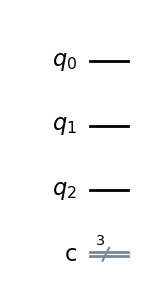

In [1]:
from qiskit import QuantumCircuit # Importiamo la libreria Qiskit e in particolare la classe QuantumCircuit

qc = QuantumCircuit(3, 3) # Creiamo un QuantumCircuit chiamato qc avente 3 qubit e 3 bit classici

qc.draw() # Visualizziamo graficamente il circuito

Per misurare i qubit usiamo _measure_ (https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.measure)

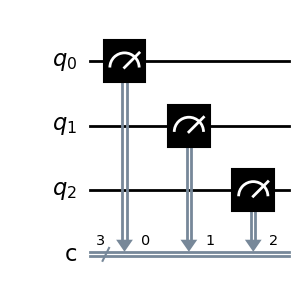

In [2]:
from qiskit import QuantumCircuit 

qc = QuantumCircuit(3, 3) 

qc.measure([0, 1, 2], [0, 1, 2]) # Misuriamo i qubit

qc.draw(output="mpl") 

*Esercizio!*

Provate a cambiare la corrispondenza tra qubit e bit classici!

Esempio: il qubit 2 viene memorizzato nel bit 0 e il qubit 0 nel bit 2

In [3]:
from qiskit.providers.aer import AerSimulator # Importiamo il simulatore locale Aer di Qiskit

sim = AerSimulator() # Creiamo un simulatore Aer chiamato sim

job = sim.run(qc) # Eseguiamo il circuito qc nel simulatore
result = job.result() # Memorizziamo i risultati dell'esecuzione in una variabile chiamata result

result.get_counts() # Visualizziamo i risultati

{'000': 1024}

Notate che qc può essere qualsiasi circuito! Il programma è indipendente dal particolare circuito che vogliamo eseguire!

*Esercizio!*

Provate a riscrivere il codice precedente stampando solo result, che ottenete?

Rivediamo tutto insieme!

In [4]:
# -------------
# --- BUILD ---
# -------------

from qiskit import QuantumCircuit # Importiamo la libreria Qiskit e in particolare la classe QuantumCircuit

qc = QuantumCircuit(3, 3) # Creiamo un QuantumCircuit chiamato qc avente 3 qubit e 3 bit classici

qc.measure([0, 1, 2], [0, 1, 2]) # Misuriamo i qubit

# ---------------
# --- EXECUTE ---
# ---------------

from qiskit.providers.aer import AerSimulator # Importiamo il simulatore locale Aer di Qiskit

sim = AerSimulator() # Creiamo un simulatore Aer chiamato sim

job = sim.run(qc) # Eseguiamo il circuito qc nel simulatore
result = job.result() # Memorizziamo i risultati dell'esecuzione in una variabile chiamata result

result.get_counts() # Visualizziamo i risultati

{'000': 1024}

*Esercizio!*

Create un circuito con 6 qubit e 3 bit classici.

Ogni qubit dispari deve essere misurato e memorizzato in un bit classico.

Eseguite il circuito sul simulatore Aer per 512 shots.

Hint1: Consultate la documentazione ufficiale!
https://qiskit.org/documentation/apidoc/index.html

Hint2: Utilizzate il template precedente!

Per eseguire un circuito in un _vero_ computer quantistico dobbiamo interagire con IBM Quantum.

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options # Importiamo tutto il necessario

service = QiskitRuntimeService(channel="ibm_quantum") # Colleghiamoci al nostro account IBM Quantum

service.backends() # Visualizziamo i backend disponibili

[<IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>]

Possiamo eseguire il nostro circuito in uno qualsiasi dei backend disponibili

In [6]:
backend = Sampler("ibmq_qasm_simulator")

job = backend.run(qc) #
result = job.result()

result.quasi_dists

base_primitive._run_primitive:INFO:2023-11-14 16:43:43,786: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


[{0: 1.0}]

Cosa accade se visualizziamo solo result?

In [7]:
backend = Sampler("ibmq_qasm_simulator")

job = backend.run(qc) #
result = job.result()

result

base_primitive._run_primitive:INFO:2023-11-14 16:43:47,682: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'max_execution_time': None, 'transpilation': {'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None, 'optimization_settings': {'level': 1}, 'coupling_map': None, 'basis_gates': None}, 'resilience': {'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator', 'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True, 'noise_model': None, 'seed_simulator': None}, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': []}, 'simulator': {'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None}}


SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])

Come visto nella lezione precedente, per modificare lo stato di un programma quantistico utilizziamo i gate quantistici (https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html).

Per applicare un gate dobbiamo semplicemente specificare quale vogliamo usare e indicare quali sono i qubit coinvolti.

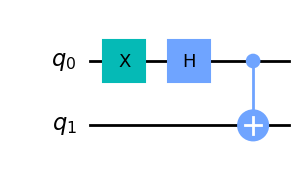

In [8]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.x(0)

qc.h(0)

qc.cx(0, 1)

qc.draw()

### Esercizi!

Create un circuito per ogni stato di Bell.

Aggiungete anche i bit classici e le operazioni di misura.

Eseguite ogni circuito su un simulatore online per 1024 shots.

Create un circuito con 2 qubit che prende in input un numero in formato
binario e aggiunge 1:

00 -> 01
01 -> 10
10 -> 11

Cosa accade se l’input è 11?

Come cambia il circuito precedente se invece di avere 2 qubit ne abbiamo 3?

Testate il circuito sul simulatore locale, un simulatore sul cloud e un quantum
computer.

Che differenze notate?

Realizzate in Qiskit il circuito per il teletrasporto quantistico!

Provate ad eseguire i circuiti precedenti su diversi computer quantistici e
simulatori.

Ci sono differenze nei tempi di esecuzione e di attesa? Perché?

Come cambia il rumore e l’affidabilità dei risultati?

### Cosa abbiamo imparato

- Come si programma un circuito quantistico con Python e Qiskit
- Come simulare in locale l’esecuzione di un circuito quantistico
- Come eseguire un circuito quantistico nel cloud di IBM Quantum su un vero computer quantistico
- Come interpretare i risultati di un’esecuzione di un circuito quantistico